# hypothesis-testing

เอกสารประกอบ<br>
1.https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce<br>
2.https://www.investopedia.com/articles/active-trading/092214/hypothesis-testing-finance-concept-examples.asp

### เรามีเหรียญอยู่ แต่สงสัยว่าเหรียญนี้จะมีการโกงหรือถ่วงน้ำหนักหรือเปล่า

In [ ]:
#เราตั้งสมมติฐาน H0 ว่า เหรียญยุติธรรม 
#H0 คือ Null Hypothesis สมมติฐานที่ไร้นัยสำคัญ ถ้าปฎิเสธเค้าได้ก็ถือว่าก็คือว่าเค้าไร้ความยุติธรรม

#ให้ H1 คือ เหรียญมีการโกงมีการถ่วงน้ำหนัก โดยให้ alpha =0.05 หรือ 5%

In [16]:
import numpy as np
import pandas as pd
r = np.random.randint(1,101,size=2000)
m = np.where(r>40,1,0)

In [132]:
m = pd.DataFrame(m)
m.sample(5)

0
1970  0
1543  1
1531  0
1728  1
832   1

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

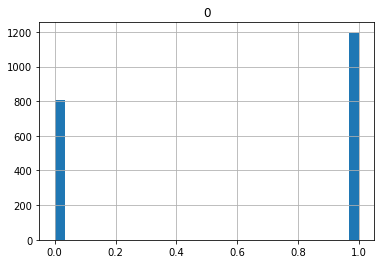

In [133]:
m.hist(bins=30)

In [134]:
m.value_counts()

1    1195
0     805
dtype: int64

In [135]:
M = m.mean()
M

0    0.5975
dtype: float64

In [136]:
# H1 มีการถ่วงน้ำหนัก 
# ให้ H1 คือ เหรียญมีการโกงมีการถ่วงน้ำหนัก โดยให้ alpha =0.05 หรือ 5%
# Error ต้องมากกว่า 5% ของค่าเฉลี่ย
abs(M - 0.05) > 0.5

0    True
dtype: bool

In [130]:
#เพราะฉะนั้น H1 เป็นจริง เหรียญมีการถ่วงน้ำหนัก
#ปฎิเสธ H0 - Reject H0

# ตัวอย่าง

In [137]:
#SET Index จะมีเปลี่ยนแปลงวันละไม่เกิน 2%  (average daily return > 2%)
#H0 : SET Index จะมีการเปลี่ยนแปลงวันละไม่เกิน 2%
#H1 : SET Index จะแกว่งเกินวันละ 2%  : ให้ alpha 5%

In [3]:
from tvDatafeed import TvDatafeed, Interval

In [4]:
tv = TvDatafeed()

you are using nologin method, data you access may be limited


In [5]:
df = tv.get_hist(symbol='set',exchange='set',interval=Interval.in_daily,n_bars=5000)
df

symbol        open        high         low       close  \
datetime                                                                       
2001-10-22 09:00:00  set:set   284.48001   285.19000   281.94000   283.42999   
2001-10-23 09:00:00  set:set   283.42999   283.42999   283.42999   283.42999   
2001-10-24 09:00:00  set:set   284.56000   285.28000   282.64001   284.06000   
2001-10-25 09:00:00  set:set   284.51001   284.56000   280.62000   280.62000   
2001-10-26 09:00:00  set:set   281.73999   282.23001   279.26999   280.60001   
...                      ...         ...         ...         ...         ...   
2022-06-07 09:00:00  set:set  1644.22000  1645.41000  1630.37000  1631.92000   
2022-06-08 09:00:00  set:set  1639.10000  1641.08000  1631.12000  1636.89000   
2022-06-09 09:00:00  set:set  1637.53000  1646.43990  1636.20000  1641.34000   
2022-06-10 09:00:00  set:set  1637.36000  1640.86000  1631.43010  1632.62000   
2022-06-13 09:00:00  set:set  1611.84000  1616.31000  1607.58000  1609.65000   

                            volume  
datetime                            
2001-10-22 09:00:00  1.000000e+100  
2001-10-23 09:00:00  1.000000e+100  
2001-10-24 09:00:00  1.000000e+100  
2001-10-25 09:00:00  1.000000e+100  
2001-10-26 09:00:00  1.000000e+100  
...                            ...  
2022-06-07 09:00:00  1.000000e+100  
2022-06-08 09:00:00  1.000000e+100  
2022-06-09 09:00:00  1.000000e+100  
2022-06-10 09:00:00  1.000000e+100  
2022-06-13 09:00:00  1.000000e+100  

[5000 rows x 6 columns]

<AxesSubplot:title={'center':'SET Index'}, xlabel='datetime'>

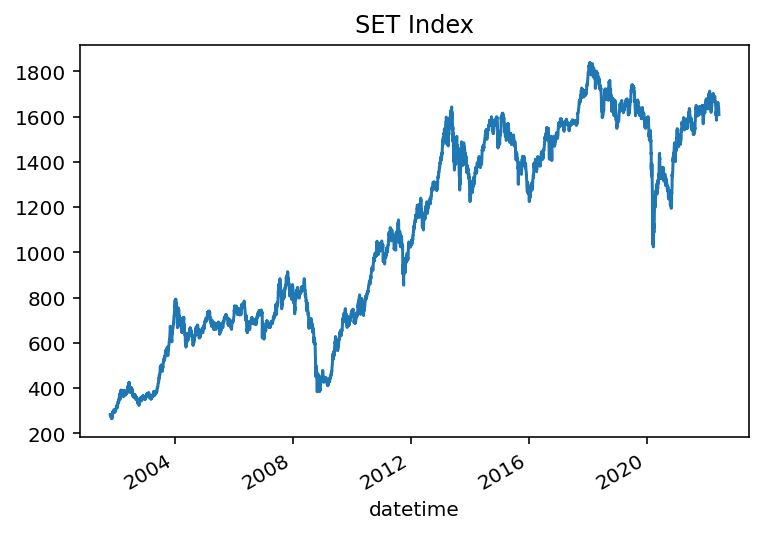

In [6]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
df['close'].plot(title='SET Index')

In [27]:
pct = df['close'].pct_change().dropna()

<AxesSubplot:>

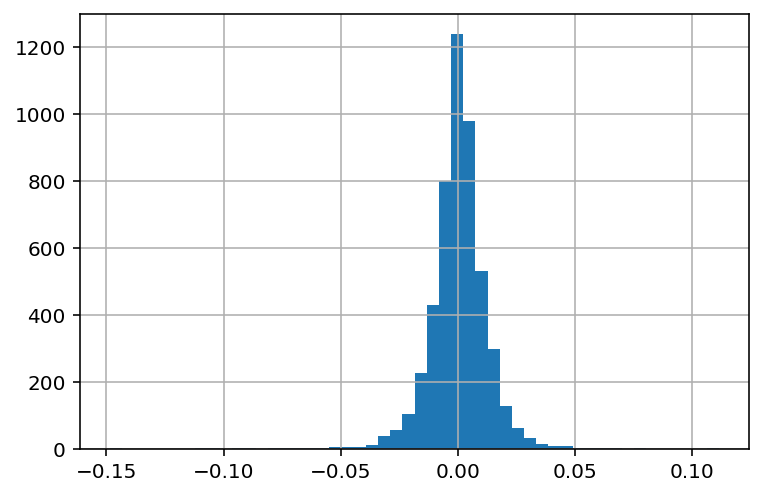

In [28]:
pct.hist(bins=50)

In [29]:
pct = pct.sort_values()

<AxesSubplot:>

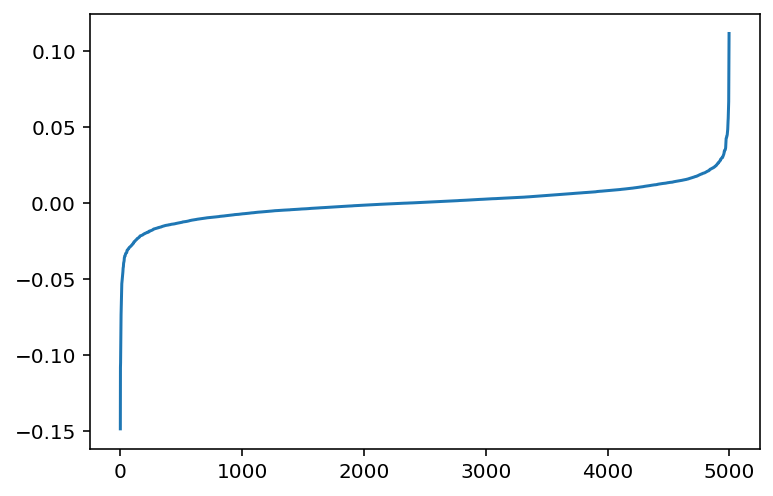

In [30]:
pct = pct.reset_index()
pct = pd.DataFrame(pct)
pct['close'].plot()

In [34]:
(len(pct)/100)*2.5

124.97500000000001

In [42]:
pct[:125]['close'].mean()

-0.03708604163772587

In [45]:
pct[len(pct)-125:]['close'].mean()

0.03391458076932162

In [ ]:
#H0 : SET Index จะมีการเปลี่ยนแปลงวันละไม่เกิน 2%
#H1 : SET Index จะแกว่งเกินวันละ 2%  : ให้ alpha 5%

#เรายอมรับ H1 เพราะมีการแกว่งเกิน 2%
#เพราะฉะนั้นปฎิเสธ H0 